In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json
import os
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data = pd.read_csv('houseprice.csv')

In [3]:
train, test = train_test_split(data, test_size=0.1, random_state=0)

In [4]:
print(train.shape)
print(test.shape)

(1314, 81)
(146, 81)


# Missing values 

In [5]:
containing_categorical_vars = [key for key, value in train.iteritems() if value.dtype == object and data[key].isnull().any()]

In [6]:
containing_categorical_vars

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
def replace_missing(df, var):
    df[var].fillna('missing', inplace=True)

In [8]:
for var in containing_categorical_vars:
    replace_missing(train, var)
    replace_missing(test, var)

C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
train['Alley'].unique()

array(['missing', 'Grvl', 'Pave'], dtype=object)

# Continous variables

In [10]:
containing_continous_vars = [key for key, value in data.iteritems() if data[key].isnull().any() and value.dtype != object]

In [11]:
containing_continous_vars

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
def replace_missing_continous(var, flag):
    mode = train[var].mode()[0]
    train[var].fillna(mode, inplace=True)
    test[var].fillna(mode, inplace=True)
    print(var)

In [13]:
for var in containing_continous_vars:
    replace_missing_continous(var, False)

LotFrontage
MasVnrArea
GarageYrBlt


In [14]:
print([key for key, value in data.iteritems() if train[key].isnull().any() and value.dtype != object])

[]


# Changing the values of temporal variables

In [15]:
containing_temporal_vars = [key for key, value in data.iteritems() if value.dtype != object and ( 'Yr' in key or 'Year' in key)]

In [16]:
containing_temporal_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
def replace_temporal_vars(df, var):
    df[var] = df['YrSold'] - df[var]
    df[var] = df[var].astype(np.int64)

In [18]:
for var in containing_temporal_vars:
    if var == 'YrSold': # we have to remove YrSold from modification list
        continue
    replace_temporal_vars(train, var)
    replace_temporal_vars(test, var)

C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
train[containing_temporal_vars].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
930           2             2            2    2009
656          49             2           49    2008
45            5             5            5    2010
1348          9             9            9    2007
55           44            44           44    2008

In [20]:
test[containing_temporal_vars].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
529         50            32           32    2007
491         65            56           65    2006
459         59            59           59    2009
279         31            31           31    2008
655         39            39           39    2010

# Log transforming the numerical variables which do not contain 0 in it

In [21]:
containing_numerical_vars = [key for key, value in data.iteritems() if value.dtype != object and key not in containing_temporal_vars]

In [22]:
containing_numerical_vars

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [23]:
def log_transform(var):
    if 0 in train[var].unique() or 0 in test[var].unique(): # as we are log transforming the values so 0 value is not allowed
        return
    train[var] = np.log(train[var])
    test[var] = np.log(test[var])

In [24]:
for var in containing_numerical_vars:
    if var in ['Id']:
        continue
    log_transform(var)

C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Removing those categories which are very rare(less than 1%)

In [25]:
print(len(train))

1314


In [26]:
x = train.groupby('BsmtFinType2')['SalePrice']

In [27]:
print(x)

In [28]:
y = train.groupby('BsmtFinType2')['SalePrice'].count()/len(train)

In [29]:
for key, value in x:
    print(key)

ALQ
BLQ
GLQ
LwQ
Rec
Unf
missing


In [30]:
print(y)

BsmtFinType2
ALQ        0.012938
BLQ        0.023592
GLQ        0.008371
LwQ        0.035008
Rec        0.034247
Unf        0.860731
missing    0.025114
Name: SalePrice, dtype: float64


In [31]:
z = y > 0.01

In [32]:
z

BsmtFinType2
ALQ         True
BLQ         True
GLQ        False
LwQ         True
Rec         True
Unf         True
missing     True
Name: SalePrice, dtype: bool

In [33]:
type(z)

pandas.core.series.Series

In [34]:
for val in z:
    print(val)

True
True
False
True
True
True
True


In [35]:
for key, value in z.iteritems():
    print (key, value)

ALQ True
BLQ True
GLQ False
LwQ True
Rec True
Unf True
missing True


In [36]:
q = train['BsmtFinType2'].replace('GLQ', 'rare')

In [37]:
q.unique()

array(['Unf', 'LwQ', 'ALQ', 'Rec', 'missing', 'BLQ', 'rare'], dtype=object)

In [38]:
def replace_rare_categories(var):
    groupbyVar = train.groupby(var)['SalePrice']
    rareElements = train.groupby(var)['SalePrice'].count() / len(train) > 0.01
    for key, value in rareElements.iteritems():
        if not value:
            train[var].replace(key, 'rare', inplace=True)
            test[var].replace(key, 'rare', inplace=True)

In [39]:
for var in containing_categorical_vars:
    replace_rare_categories(var)

C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
train['BsmtFinType2'].unique()

array(['Unf', 'LwQ', 'ALQ', 'Rec', 'missing', 'BLQ', 'rare'], dtype=object)

In [41]:
cat_vars = [key for key, value in train.iteritems() if value.dtype == object]

In [42]:
for var in cat_vars:
    unique_train = train[var].unique()
    unique_test = test[var].unique()
    for element in unique_test:
        if element not in unique_train:
            test[var].replace(element, 'rare', inplace=True)

In [43]:
flag = False

In [44]:
for var in cat_vars:
    unique_train = train[var].unique()
    unique_test = test[var].unique()
    for element in unique_test:
        if element not in unique_train:
            flag = True
        if flag:
            break
    if flag:
        print("Test failed for {}".format(var))
        break
if not flag:
    print("Test passed.")

Test failed for Condition2


# Converting the strings to numerical values for categorical variables

In [45]:
def string_to_number_encoding(var):
    print()
    print(var)
    print()
    unique_elements = train[var].unique()
    
    # these dictionaries will be used later during inference time
    id_to_cls = dict()
    cls_to_id = dict()
    
    for i, element in enumerate(unique_elements):
        id_to_cls[i] = element
        cls_to_id[element] = i
        train[var].replace(element, i, inplace=True)
        test[var].replace(element, i, inplace=True)
        
    unique_train = train[var].unique()
    unique_test = test[var].unique()
    for element in unique_test:
        if element not in unique_train:
            if 'rare' not in cls_to_id.keys():
                id_to_cls[len(unique_elements)] = 'rare'
                cls_to_id['rare'] = len(unique_elements)
            test[var].replace(element, cls_to_id['rare'], inplace=True)
        
    json.dump(id_to_cls, open(os.path.join('util_files', 'id_to_cls_' + var + '.json'), 'w'))
    json.dump(cls_to_id, open(os.path.join('util_files', 'cls_to_id_' + var + '.json'), 'w'))    

In [46]:
containing_categorical_vars = [key for key, value in data.iteritems() if value.dtype == object]

In [47]:
len(containing_categorical_vars)

43

In [48]:
pwd

'C:\\Projects\\Model Deployment'

In [49]:
for var in containing_categorical_vars:
    string_to_number_encoding(var)


MSZoning


Street


Alley


LotShape


LandContour


Utilities


LotConfig


LandSlope


Neighborhood


Condition1


Condition2


BldgType


HouseStyle


RoofStyle


RoofMatl


Exterior1st


Exterior2nd


MasVnrType


ExterQual


ExterCond


Foundation


BsmtQual


BsmtCond


BsmtExposure


BsmtFinType1


BsmtFinType2


Heating


HeatingQC



C:\Users\smodak\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



CentralAir


Electrical


KitchenQual


Functional


FireplaceQu


GarageType


GarageFinish


GarageQual


GarageCond


PavedDrive


PoolQC


Fence


MiscFeature


SaleType


SaleCondition



In [50]:
nan = [key for key, value in train.iteritems() if train[key].isnull().any()]

In [51]:
nan

[]

In [52]:
train['Condition1'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [53]:
test['Condition1'].unique()

array([0, 3, 2, 1, 7], dtype=int64)

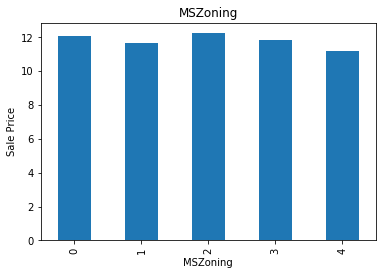

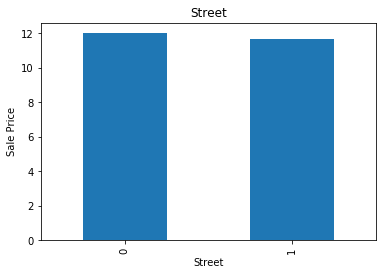

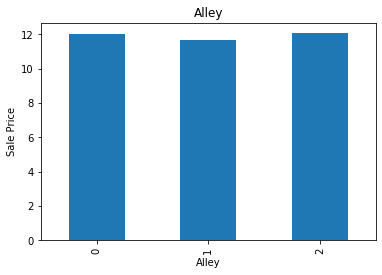

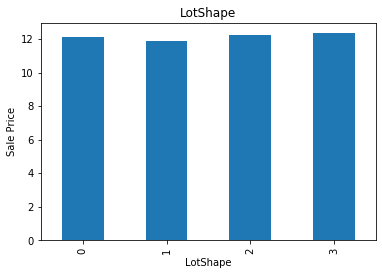

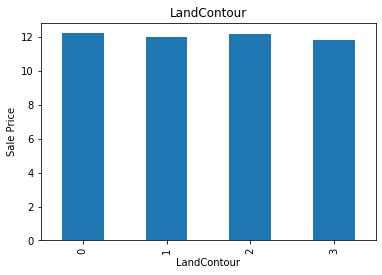

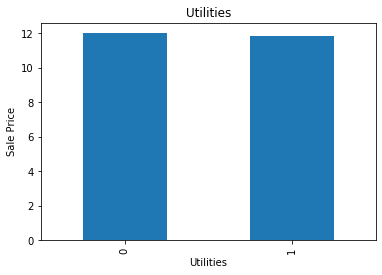

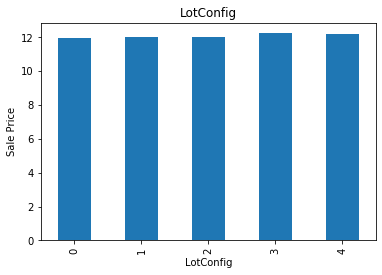

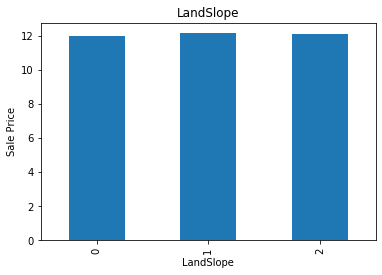

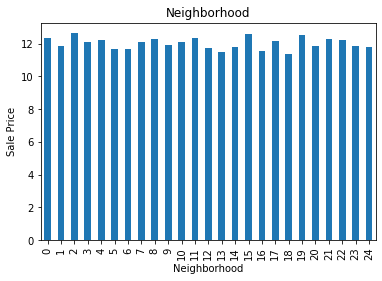

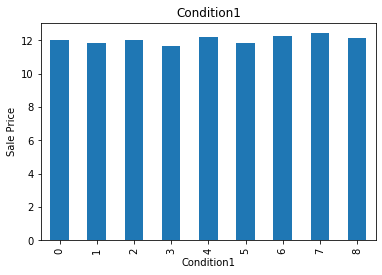

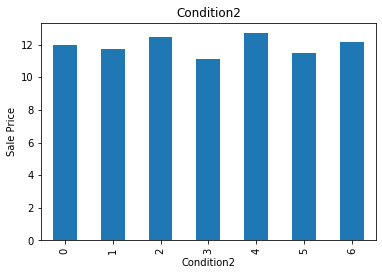

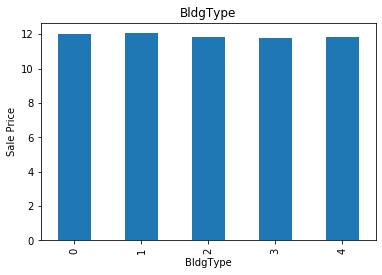

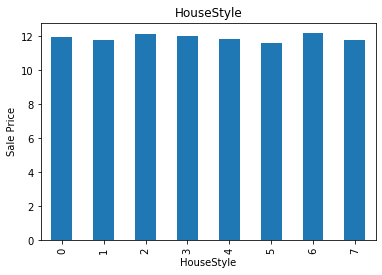

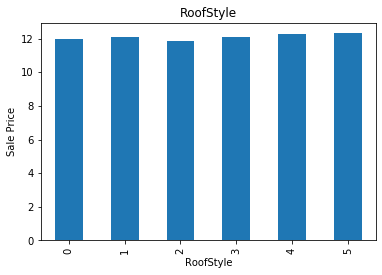

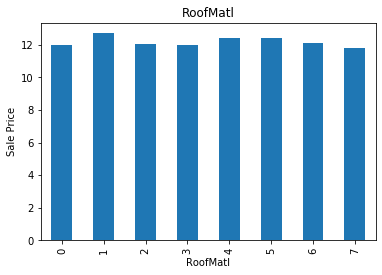

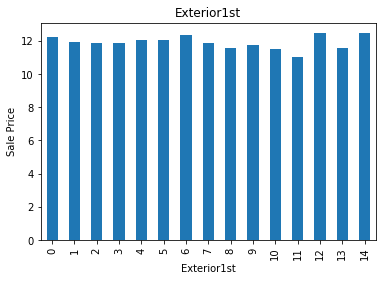

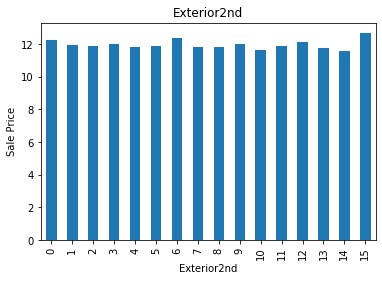

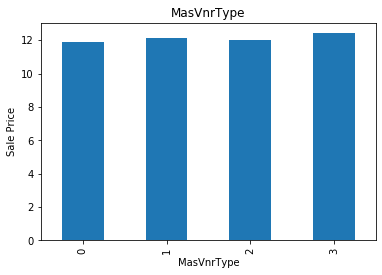

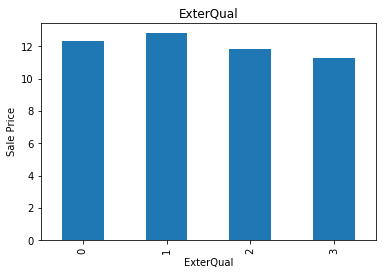

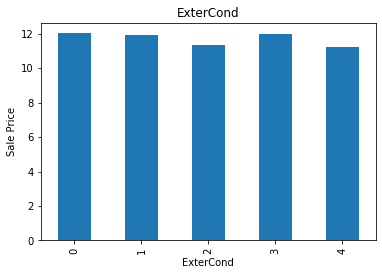

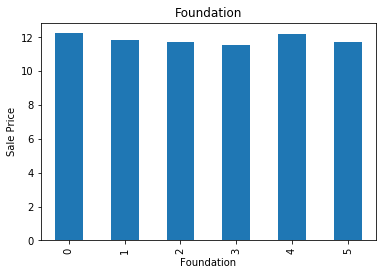

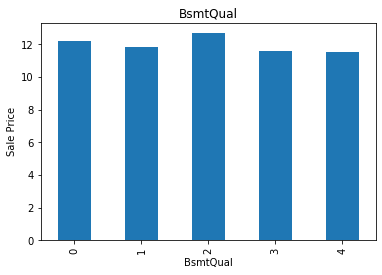

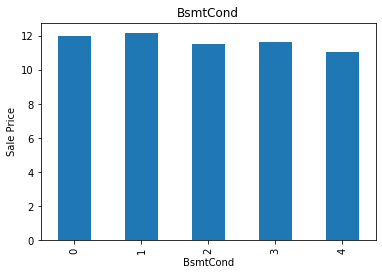

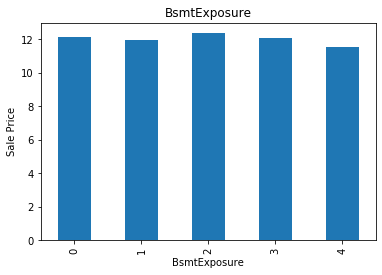

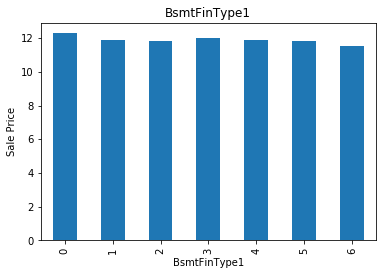

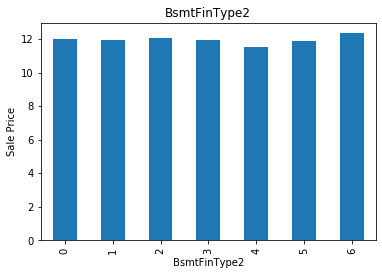

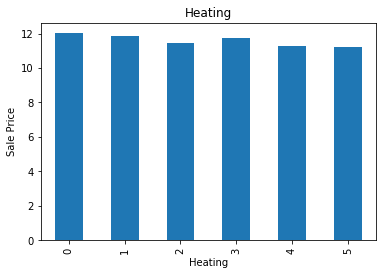

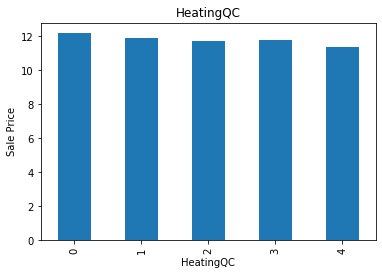

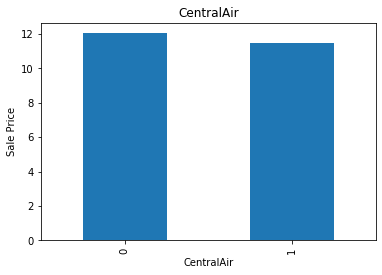

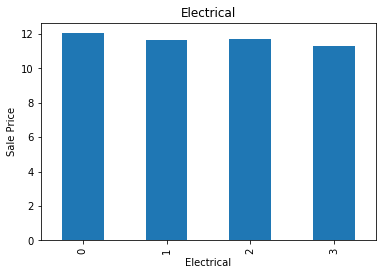

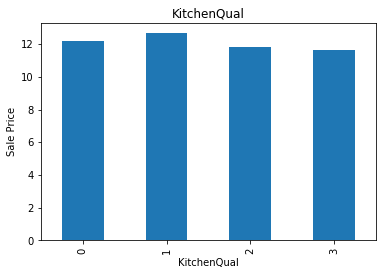

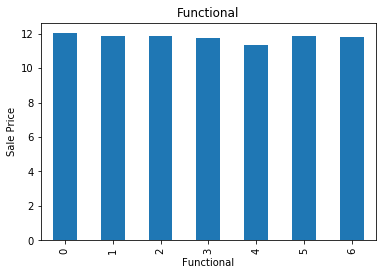

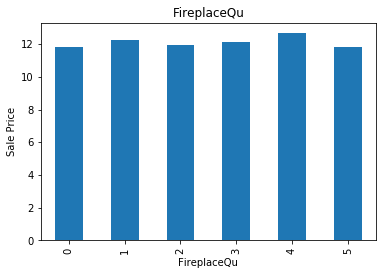

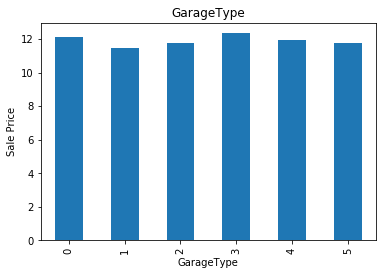

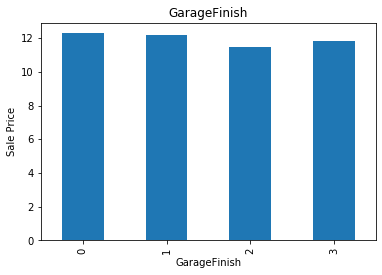

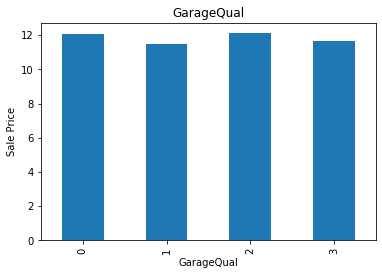

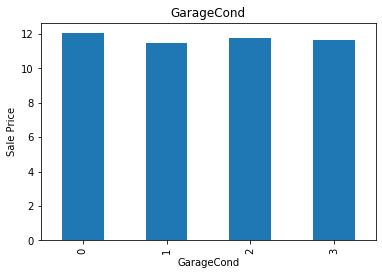

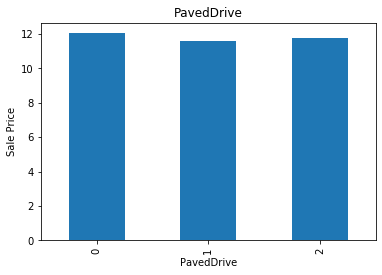

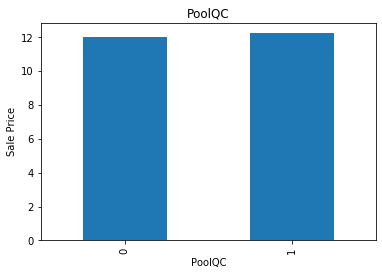

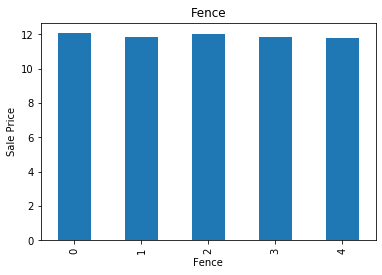

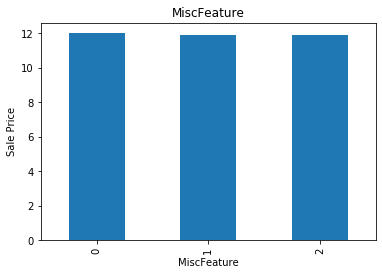

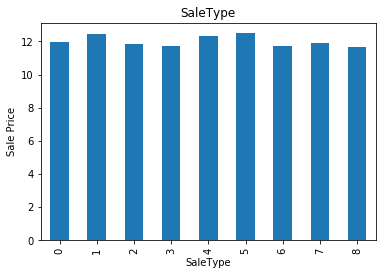

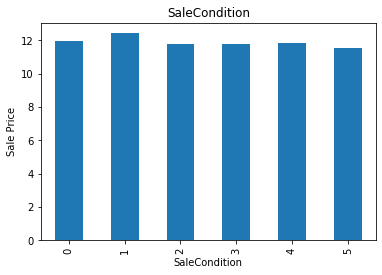

In [54]:
def analayse_cat_vars(df, var):
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('Sale Price')
    plt.xlabel(var)
    plt.show()

for var in containing_categorical_vars:
    analayse_cat_vars(train, var)

# Feature Scaling

In [55]:
train_vars = [var for var in train.columns if var not in ['Id', 'SalePrice']]
len(train_vars)

79

In [56]:
train[['Id', 'SalePrice']].reset_index(drop=True)

Id  SalePrice
0      931  12.211060
1      657  11.887931
2       46  12.675764
3     1349  12.278393
4       56  12.103486
...    ...        ...
1309   764  12.727838
1310   836  11.759786
1311  1217  11.626254
1312   560  12.363076
1313   685  12.305918

[1314 rows x 2 columns]

In [57]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(train[train_vars]) #  fit  the scaler to the train set for later use

# transform the train and test set, and add on the Id and SalePrice variables
X_train = pd.concat([train[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train[train_vars]), columns=train_vars)],
                    axis=1)

X_test = pd.concat([test[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test[train_vars]), columns=train_vars)],
                    axis=1)

In [58]:
X_train.isnull().sum()

Id               0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 81, dtype: int64

In [59]:
X_test.isnull().sum()

Id               0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 81, dtype: int64

In [60]:
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)